<a href="https://colab.research.google.com/github/LIZKA30/ML_2025_autumn/blob/main/homework-practice-02_part_1_2/Lab2-2.%D0%9A%D1%83%D0%B7%D0%BD%D0%B5%D1%86%D0%BE%D0%B2%D0%B0.%20%D0%95%D0%BB%D0%B8%D0%B7%D0%B0%D0%B2%D0%B5%D1%82%D0%B0.%20%D0%9D%D0%9F%D0%9C%D0%B1%D0%B4-01-23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Матрица ковариации (через поворот):
 [[ 0.13244975 -0.12188162]
 [-0.12188162  0.13009649]]


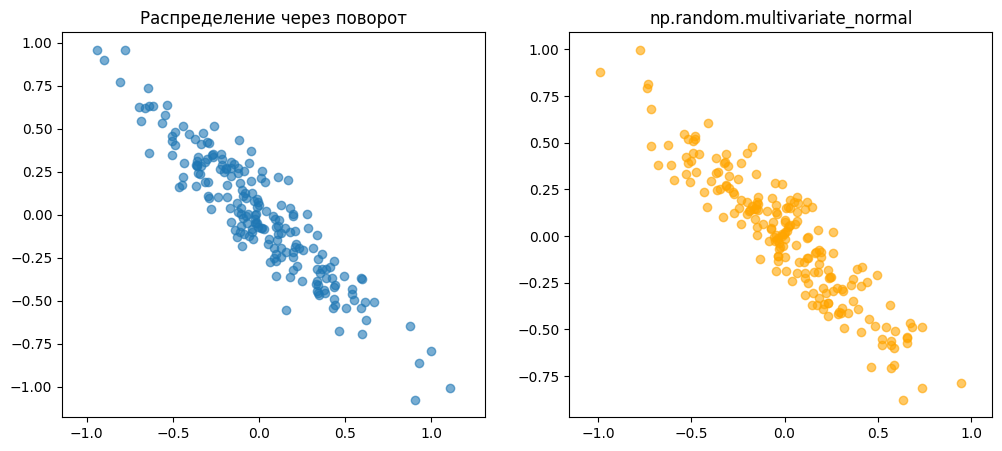

In [ ]:
1#
import numpy as np
import matplotlib.pyplot as plt

M = 200
sigma1 = 0.1
sigma2 = 0.5

x1 = np.random.randn(M, 1) * sigma1
x2 = np.random.randn(M, 1) * sigma2
X = np.concatenate((x1, x2), axis=1)

alpha = np.pi / 4
R = np.array([
    [np.cos(alpha), -np.sin(alpha)],
    [np.sin(alpha),  np.cos(alpha)]
])

X_rot = X @ R.T

cov_matrix = np.cov(X_rot.T)
print("Матрица ковариации (через поворот):\n", cov_matrix)

mean = np.zeros(2)
X_mv = np.random.multivariate_normal(mean, cov_matrix, size=M)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_rot[:, 0], X_rot[:, 1], alpha=0.6)
plt.title("Распределение через поворот")
plt.axis("equal")

plt.subplot(1, 2, 2)
plt.scatter(X_mv[:, 0], X_mv[:, 1], alpha=0.6, color="orange")
plt.title("np.random.multivariate_normal")
plt.axis("equal")

plt.show()


Оцененное среднее μ:
 [0.03240583 0.0324196 ]
Оцененная ковариация C:
 [[0.28747873 0.21242969]
 [0.21242969 0.39948418]]


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


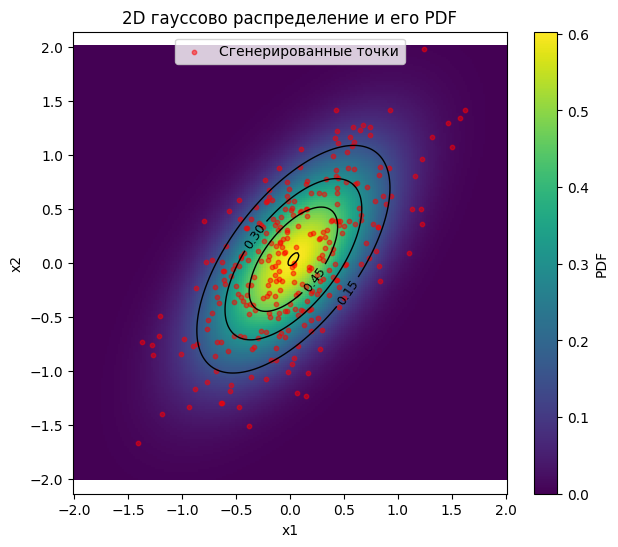

In [ ]:
2#
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

M = 300
mean_true = [0, 0]
cov_true = [[0.3, 0.2],
            [0.2, 0.4]]

X = np.random.multivariate_normal(mean_true, cov_true, size=M)

mu = np.mean(X, axis=0)
C = np.cov(X.T)

print("Оцененное среднее μ:\n", mu)
print("Оцененная ковариация C:\n", C)

xx = np.linspace(-2, 2, 200)
yy = np.linspace(-2, 2, 200)
XX, YY = np.meshgrid(xx, yy)
points = np.stack((XX.flatten(), YY.flatten()), axis=1)

m = multivariate_normal(mean=mu, cov=C)
ZZ = m.pdf(points).reshape(XX.shape)

plt.figure(figsize=(7, 6))

IMG = plt.pcolor(XX, YY, ZZ, shading="auto", cmap="viridis")
plt.colorbar(IMG, label="PDF")

CS = plt.contour(XX, YY, ZZ, levels=5, colors="k", linewidths=1)
plt.clabel(CS, inline=1, fontsize=9)

plt.scatter(X[:, 0], X[:, 1], c="red", s=10, alpha=0.5, label="Сгенерированные точки")

plt.title("2D гауссово распределение и его PDF")
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.legend()
plt.show()

mu0 = [-0.01185307  0.01642117]
C0 =
 [[0.45230954 0.09738451]
 [0.09738451 0.28514133]]
mu1 = [1.50962568 1.45559569]
C1 =
 [[ 0.30989913 -0.10968031]
 [-0.10968031  0.5044872 ]]


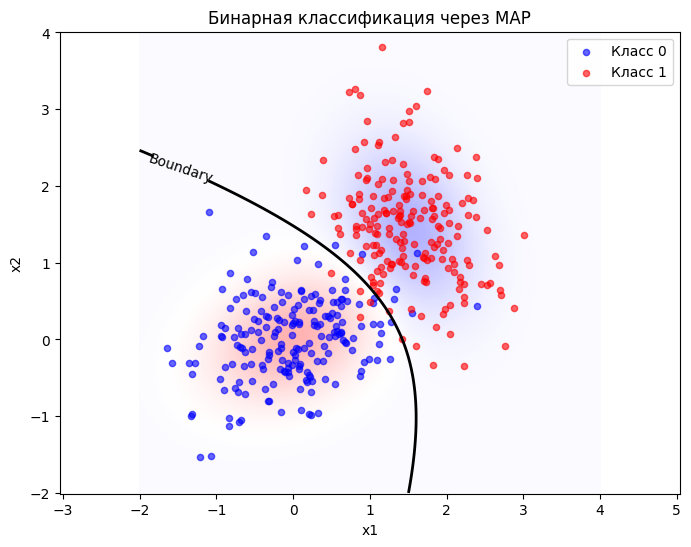

In [ ]:
3#
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

np.random.seed(42)
N = 200

mu0 = [0, 0]
cov0 = [[0.5, 0.1],
        [0.1, 0.3]]
X0 = np.random.multivariate_normal(mu0, cov0, size=N)
y0 = np.zeros(N)

mu1 = [1.5, 1.5]
cov1 = [[0.3, -0.1],
        [-0.1, 0.5]]
X1 = np.random.multivariate_normal(mu1, cov1, size=N)
y1 = np.ones(N)

X = np.vstack([X0, X1])
y = np.concatenate([y0, y1])

mu0_est = X0.mean(axis=0)
C0_est = np.cov(X0.T)
mu1_est = X1.mean(axis=0)
C1_est = np.cov(X1.T)

print("mu0 =", mu0_est)
print("C0 =\n", C0_est)
print("mu1 =", mu1_est)
print("C1 =\n", C1_est)

p0 = len(X0) / len(X)
p1 = len(X1) / len(X)

xx = np.linspace(-2, 4, 300)
yy = np.linspace(-2, 4, 300)
XX, YY = np.meshgrid(xx, yy)
points = np.stack([XX.ravel(), YY.ravel()], axis=1)

dist0 = multivariate_normal(mean=mu0_est, cov=C0_est)
dist1 = multivariate_normal(mean=mu1_est, cov=C1_est)

lhs = dist0.pdf(points) * p0
rhs = dist1.pdf(points) * p1
diff = (lhs - rhs).reshape(XX.shape)

plt.figure(figsize=(8, 6))

plt.pcolormesh(XX, YY, diff, cmap="bwr", shading="auto", alpha=0.3)

CS = plt.contour(XX, YY, diff, levels=[0], colors="k", linewidths=2)
plt.clabel(CS, fmt="Boundary", fontsize=10)

plt.scatter(X0[:, 0], X0[:, 1], c="blue", s=20, alpha=0.6, label="Класс 0")
plt.scatter(X1[:, 0], X1[:, 1], c="red", s=20, alpha=0.6, label="Класс 1")

plt.legend()
plt.title("Бинарная классификация через MAP")
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.show()


In [ ]:
4#
import numpy as np
from sklearn.base import BaseEstimator

class myLDA(BaseEstimator):
    def __init__(self):
        pass

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        n_features = X.shape[1]

        X0 = X[y == self.classes_[0]]
        X1 = X[y == self.classes_[1]]

        self.mu0_ = X0.mean(axis=0)
        self.mu1_ = X1.mean(axis=0)

        C0 = np.cov(X0.T)
        C1 = np.cov(X1.T)
        self.C_ = (C0 * (len(X0)-1) + C1 * (len(X1)-1)) / (len(X) - 2)

        self.p0_ = len(X0) / len(X)
        self.p1_ = len(X1) / len(X)

        self.Cinv_ = np.linalg.inv(self.C_)
        return self

    def decision_function(self, X):
        def g(x, mu, p):
            return x @ self.Cinv_ @ mu - 0.5 * mu @ self.Cinv_ @ mu + np.log(p)

        g0 = np.apply_along_axis(lambda xx: g(xx, self.mu0_, self.p0_), 1, X)
        g1 = np.apply_along_axis(lambda xx: g(xx, self.mu1_, self.p1_), 1, X)
        return g1 - g0

    def predict(self, X):
        return (self.decision_function(X) > 0).astype(int)

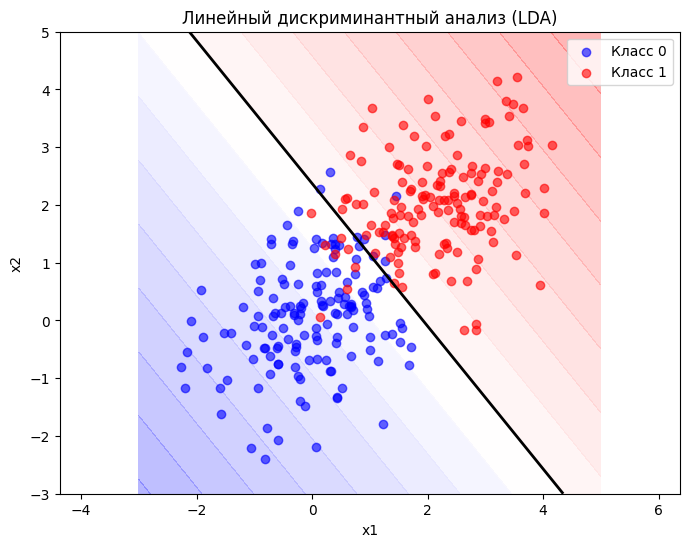

In [ ]:
import matplotlib.pyplot as plt

np.random.seed(0)
N = 150

mu0 = [0, 0]
mu1 = [2, 2]
C = [[0.8, 0.2],
     [0.2, 0.8]]

X0 = np.random.multivariate_normal(mu0, C, size=N)
X1 = np.random.multivariate_normal(mu1, C, size=N)
X = np.vstack([X0, X1])
y = np.array([0]*N + [1]*N)

lda = myLDA().fit(X, y)

xx, yy = np.meshgrid(np.linspace(-3, 5, 200),
                     np.linspace(-3, 5, 200))
points = np.c_[xx.ravel(), yy.ravel()]

Z = lda.decision_function(points).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contour(xx, yy, Z, levels=[0], colors='k', linewidths=2)
plt.contourf(xx, yy, Z, levels=20, cmap="bwr", alpha=0.3)

plt.scatter(X0[:,0], X0[:,1], c="blue", label="Класс 0", alpha=0.6)
plt.scatter(X1[:,0], X1[:,1], c="red", label="Класс 1", alpha=0.6)

plt.legend()
plt.title("Линейный дискриминантный анализ (LDA)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.show()

In [ ]:
5#
import numpy as np
from sklearn.base import BaseEstimator

class myNB(BaseEstimator):
    def __init__(self):
        pass

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        n_classes = len(self.classes_)
        n_features = X.shape[1]

        self.means_ = {}
        self.vars_ = {}
        self.priors_ = {}

        for c in self.classes_:
            Xc = X[y == c]
            self.means_[c] = Xc.mean(axis=0)
            self.vars_[c] = Xc.var(axis=0) + 1e-9
            self.priors_[c] = len(Xc) / len(X)

        return self

    def _log_likelihood(self, X, mean, var):
        return -0.5 * np.sum(np.log(2 * np.pi * var)) - 0.5 * np.sum(((X - mean) ** 2) / var, axis=1)

    def predict(self, X):
        log_probs = []
        for c in self.classes_:
            mean = self.means_[c]
            var = self.vars_[c]
            prior = np.log(self.priors_[c])
            log_likelihood = self._log_likelihood(X, mean, var)
            log_probs.append(prior + log_likelihood)

        log_probs = np.array(log_probs).T
        return self.classes_[np.argmax(log_probs, axis=1)]

Accuracy: 0.98


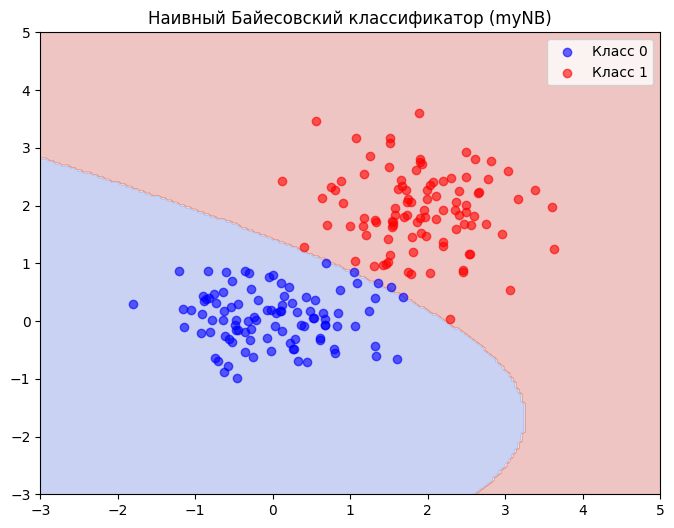

In [ ]:
import matplotlib.pyplot as plt

np.random.seed(0)
N = 100
X0 = np.random.multivariate_normal([0, 0], [[0.5, 0], [0, 0.2]], size=N)
X1 = np.random.multivariate_normal([2, 2], [[0.5, 0], [0, 0.5]], size=N)

X = np.vstack([X0, X1])
y = np.array([0]*N + [1]*N)

nb = myNB().fit(X, y)
y_pred = nb.predict(X)

print("Accuracy:", (y_pred == y).mean())

xx, yy = np.meshgrid(np.linspace(-3, 5, 200), np.linspace(-3, 5, 200))
points = np.c_[xx.ravel(), yy.ravel()]
Z = nb.predict(points).reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
plt.scatter(X0[:,0], X0[:,1], c="blue", label="Класс 0", alpha=0.6)
plt.scatter(X1[:,0], X1[:,1], c="red", label="Класс 1", alpha=0.6)
plt.legend()
plt.title("Наивный Байесовский классификатор (myNB)")
plt.show()

In [ ]:
6#
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

X, y = make_classification(
    n_samples=500, n_features=2, n_informative=2, n_redundant=0,
    n_clusters_per_class=1, flip_y=0.05, class_sep=1.5, random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

lda = myLDA().fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)

nb = myNB().fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

def evaluate(y_true, y_pred, name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    print(f"\n{name}:")
    print(f"Accuracy = {acc:.3f}")
    print(f"Precision = {prec:.3f}")
    print(f"Recall = {rec:.3f}")

evaluate(y_test, y_pred_lda, "LDA")
evaluate(y_test, y_pred_nb, "Naive Bayes")



LDA:
Accuracy = 0.900
Precision = 0.899
Recall = 0.910

Naive Bayes:
Accuracy = 0.893
Precision = 0.869
Recall = 0.936


Выводы:
1.   В ходе работы я познакомилась с методами снижения размерности и сжатия данных (SVD), изучила свойства многомерного гауссового распределения, закрепила навыки построения классификаторов на основе вероятностных моделей (MAP, LDA, NB), научилась сравнивать алгоритмы с помощью метрик качества.

2.   Выбор классификатора сильно зависит от структуры данных. Если признаки скоррелированы, лучше работает LDA. Если данные более независимы или требуется простая модель — подходит наивный Байес.


